# **Import**

In [9]:
import csv
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Raspakiravanje .rar datoteke i pripadni moduli**

In [10]:
!pip install pyunpack
!pip install patool

from pyunpack import Archive
Archive('GTSRB.rar').extractall('./')

# **Učitavanje podataka**

In [11]:
def readTrafficSigns(rootpath):
    """Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Images/Final_Training'
    Returns:   list of images, list of corresponding labels
    """
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 43 classes
    for c in range(0,43):
        prefix = rootpath + '/' + 'Images' + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader)
        # gtReader.next() # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

trainImages, trainLabels = readTrafficSigns('GTSRB/Final_Training')

# **Ispis i primjeri slika**

Broj labela: 39209  te broj slika:  39209
Oznaka:  0


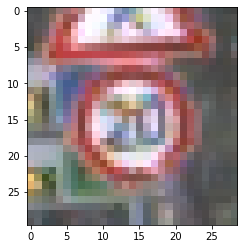

Oznaka:  3


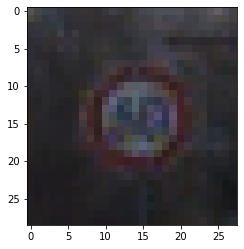

Oznaka:  8


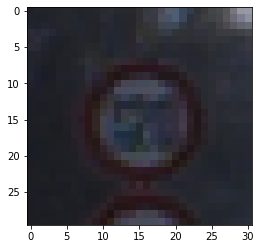

Oznaka:  12


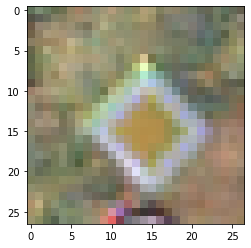

Oznaka:  16


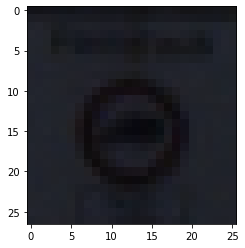

Oznaka:  26


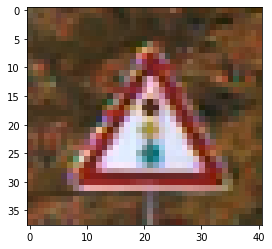

Oznaka:  38


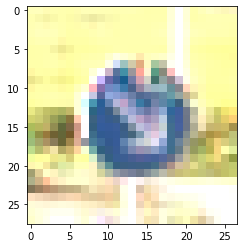

In [12]:
print("Broj labela:", len(trainLabels), " te broj slika: ", len(trainImages))

for i in range(len(trainLabels)):
  if i%6000 == 0:
    print("Oznaka: ", trainLabels[i])
    plt.imshow(trainImages[i])
    plt.show()


# **Ujednačavanje veličine slika** 

In [13]:
# Detektiranje minimalnih dimenzija slike
# Resizeanje svih slika na dimenzije dane u varijabli new_dimensions

min_m = math.inf
min_n = math.inf
for i in range(len(trainImages)):
  image_shape = trainImages[i].shape
  m = image_shape[0]
  n = image_shape[1]

  if m < min_m:
    min_m = m
  if n < min_n:
    min_n = n

print("Minimalne dimenzije su: ", min_m, " i ", min_n)
trainImagesResized = []
new_dimensions = [30, 30]
for i in range(len(trainImages)):
  trainImagesResized.append(cv2.resize(trainImages[i], dsize = (new_dimensions[0], new_dimensions[1]), interpolation=cv2.INTER_CUBIC))

Minimalne dimenzije su:  25  i  25


# **Provjera oznaka**

In [14]:
# Jesu li sve oznake validne, tj u intervalu ['0', '42']

class_list = [*range(0,43)]
class_list = [str(x) for x in class_list]

for i in range(len(trainLabels)):
  if trainLabels[i] not in class_list:
    print("Invalid class detected!")

# **Veličina klasa u training setu**

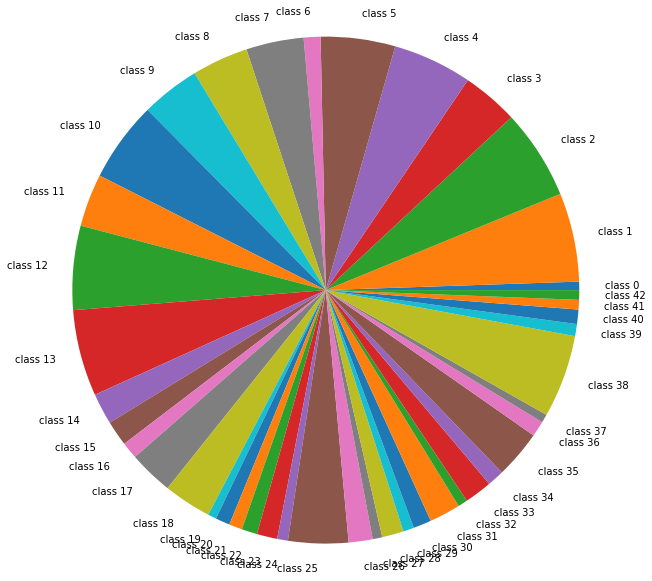

In [43]:
counter = [0] * 43
for i in range(len(trainLabels)):
  label = int(trainLabels[i])
  counter[label] = counter[label] + 1

my_labels = ["class " + str(i) for i in range(43)]

my_labels = tuple(my_labels)
plt.figure(figsize = (10,10))
plt.pie(counter,labels=my_labels)
plt.axis('equal')
plt.show()
